<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 7th, 2024

# In case you would like a good reference

Here is a good book if you want to take a more in-depth dive into Python and data science:

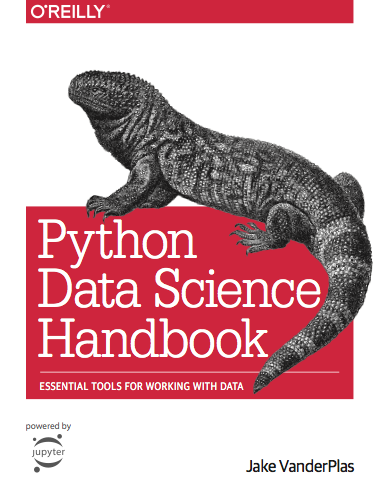

A few cool things about this book:
- It is available in print for not much; [it is available online for free](https://jakevdp.github.io/PythonDataScienceHandbook/).
- It has been written using notebooks!
- It gives a very good introduction to NumPy, Pandas, Matplotlib, and Scikit-Learn.

# First hour: Scatterplots and bar-plots

Before we start, an overview:

*   **Matplotlib** is a library used for making graphs and visualizations in Python. [Here are examples of the types of plots that Matplotlib supports:](https://matplotlib.org/stable/plot_types/index.html)

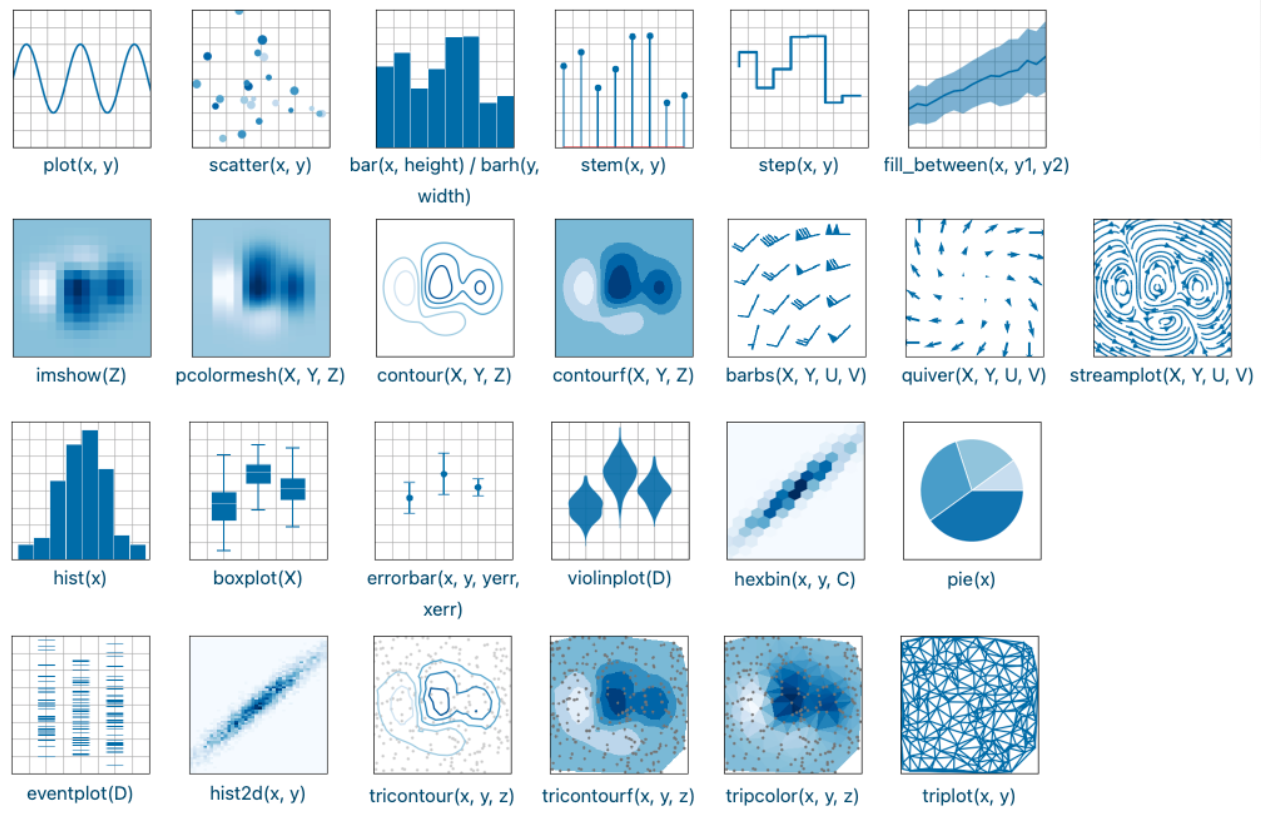

*   **Seaborn** is another library that builds upon Matplotlib which produces high-quality visualization and is more user-friendly than Matplotlib. [Here are examples of the types of plots that Seaborn supports:](https://seaborn.pydata.org/examples/index.html)

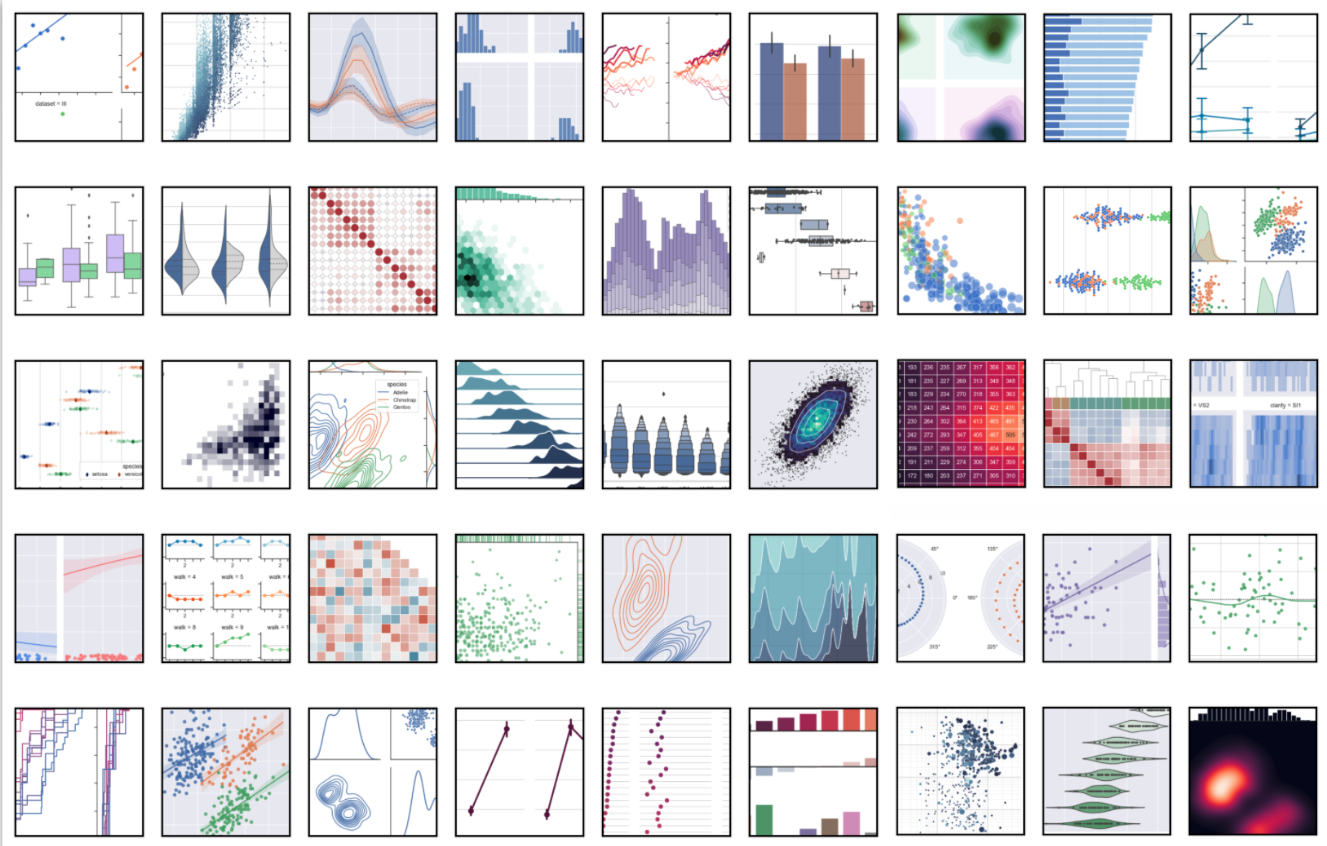

*   There are several easy-to-follow resources online to show you how to make these visualizations. Some are listed below in the 'Resources' section.
*   We will cover a few common visualizations used in health and bioinformatics.

**Context:**

* The `healthexp` dataset contains information on healthcare spending in USD and life expectancy across countries, between 1970 to 2021.
* It is an open-access dataset available as part of the `Seaborn` example datasets.


1. Load the dataset and view the top 5 rows

In [ ]:
import seaborn as sns
healthexp = sns.load_dataset('healthexp')

2. View the top 5 rows of the dataset

In [ ]:
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


3. Visualize the relationship between life expectancy and spending between 1970 and 1979

We will:
* create a subset of the healthexp dataset containing data only for the years 1970 and 1979;
* use a scatterplot as we are examining the relationship between two continuous variables.

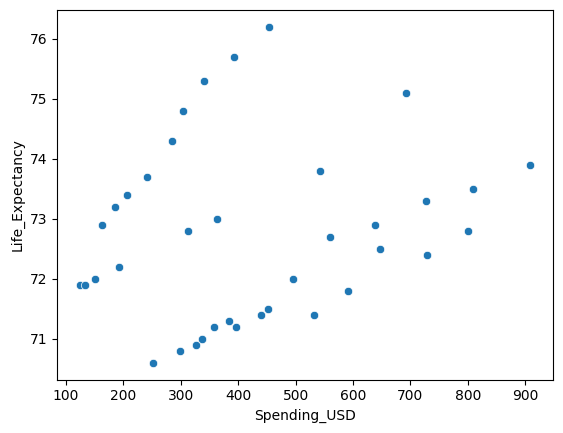

In [ ]:
healthexp_1970_79 = healthexp.loc[(healthexp['Year']<1980)]
sns.scatterplot(healthexp_1970_79, x='Spending_USD', y='Life_Expectancy');

There seems to be an overall positive correlation between life expectancy and spending. However, it seems like there is more structure in these data than what this plot allows to unpack. This might be due to differences between countries. We can have a look at this by using the country as the "hue" (color) argument.

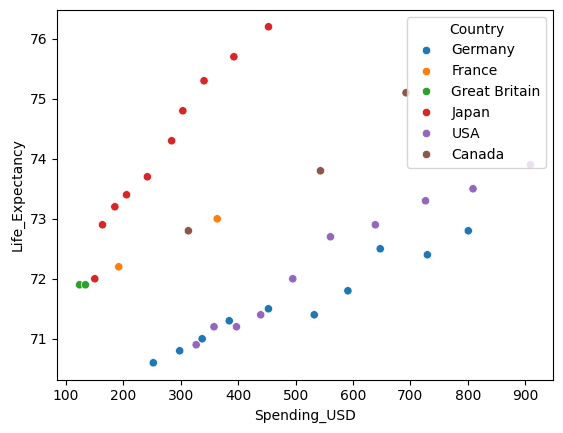

In [ ]:
sns.scatterplot(healthexp_1970_79, x='Spending_USD',
                y='Life_Expectancy', hue="Country");

In general, life expectancy increases with spending on healthcare - this relationship is strongest for Japan.

4. Visualize how the relationship between life expectancy and spending changed between 1970-79 and 1980-89.
* We will create another subset of the DataFrame that contains only data between the years 1980-89
* We will plot two scatterplots side by side, one for 1970-79 and one for 1980-89

Text(0.5, 0.01, 'Spending_USD')

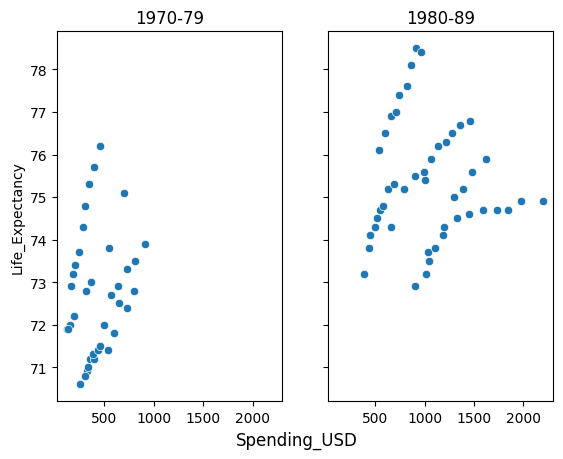

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,2,sharex=True, sharey=True)


healthexp_1980_89 = healthexp.loc[(healthexp['Year']>1979) & (healthexp['Year']<1989)]

scatterplot_1970_79 = sns.scatterplot(healthexp_1970_79, x='Spending_USD', y='Life_Expectancy', ax=axes[0])
scatterplot_1970_79.set(xlabel=None)
axes[0].set_title('1970-79')

scatterplot_1980_89 = sns.scatterplot(healthexp_1980_89, x='Spending_USD', y='Life_Expectancy', ax=axes[1])
scatterplot_1980_89.set(xlabel=None)
axes[1].set_title('1980-89')

fig.supxlabel('Spending_USD')

Both life expectancy and spending on healthcare increased between 1980-89 compared to 1970-79. The association between the two variables seems to plateau towards the second half of 1980-89.

Note that different approaches can be used to obtain the same result. Seaborn has functions that can create figures with multiple panels without needing to manually create the different subplots:

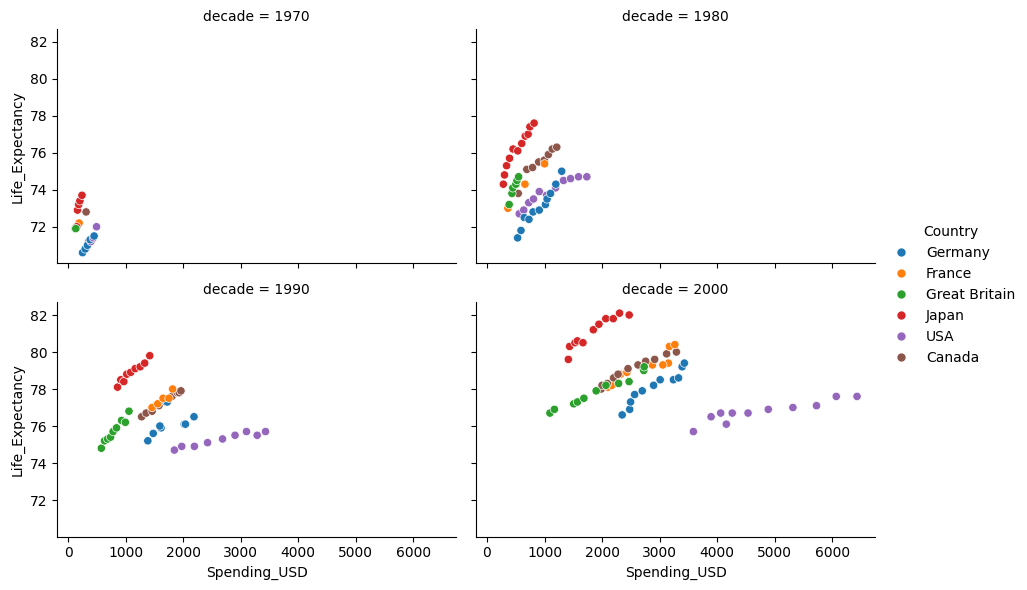

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

healthexp["decade"] = np.round(healthexp['Year'], -1)

sns.relplot(data=healthexp, x='Spending_USD', y='Life_Expectancy',
            col="decade", kind="scatter", hue="Country", col_wrap=2,
            col_order=[1970, 1980, 1990, 2000], height=3, aspect=1.5);

5. Compare spending across countries in 1970

* We will create a subset of the DataFrame that only contains data for the year 1970
* We will use a bar chart because we are comparing a continuous variable (spending) across a categorical variable (Country)

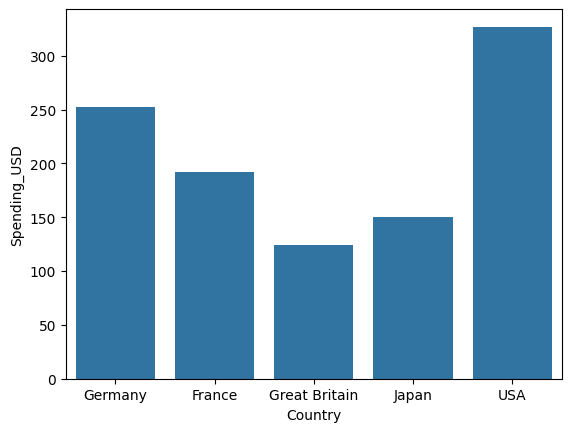

In [ ]:
healthexp_1970 = healthexp.loc[(healthexp['Year']==1970)]
sns.barplot(healthexp_1970, x='Country', y='Spending_USD');

The US spent the most on healthcare compared to other countries.

6. Compare spending across countries in 1970 vs 1980

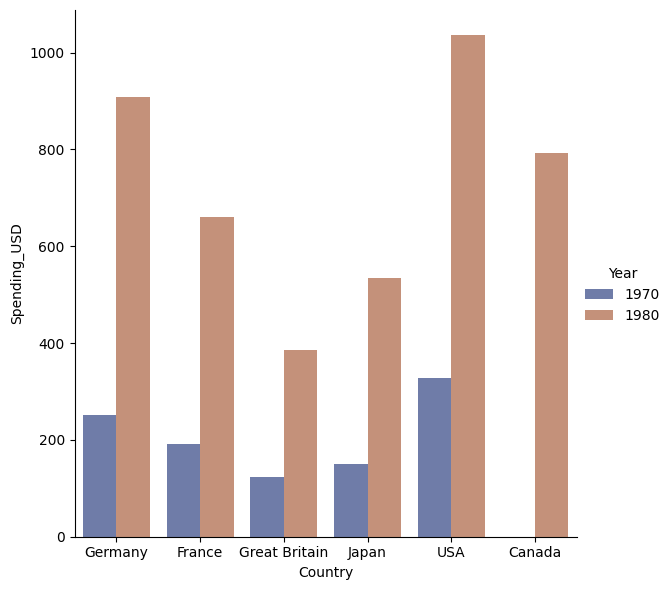

In [ ]:
healthexp_1970_1980 = healthexp.loc[(healthexp['Year']==1970) | (healthexp['Year']==1980)]

sns.catplot(
    data=healthexp_1970_1980, kind="bar",
    x="Country", y="Spending_USD", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6
);

Spending increased for all countries from 1970 to 1980. For Canada, there is no blue bar because there is no spending data for 1970. The USA remained the country with the highest spending in 1980, like in 1970.

**Note:** We are not running statistical tests in this session. Some additional libraries for those interested in statistical testing:
* Probability distributions and simple tests (e.g., T-test): [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
* Regression, linear models, time series analysis: [statsmodels](https://www.statsmodels.org/stable/index.html)
* Bayesian statistical modeling, probabilistic machine learning: [PyMC](https://docs.pymc.io/)
* Classification, regression, model selection: [scikit-learn](https://scikit-learn.org/)
* Python to R bridge: [rpy2](https://rpy2.github.io/)

## Exercises


1.   The 'exercise' dataset contains information on 89 individuals randomly assigned based on three criteria:
  * Either a 'low-fat' or a 'no-fat' diet group
  * One of three exercise groups i) rest ii) walking iii) running.
  * They are assigned to do their respective exercise for 1 min, 15 min or 30 mins.

Load the dataset using this command: sns.load_dataset('exercise')




2. Visually compare the association between `pulse` and `time` in the group following a 'no fat' diet, for each of the three exercise conditions.

3.   Visually compare the number of people allocated to each exercise group, by diet (hint: use [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html))

# Second hour: Heat maps and cluster maps

Context:

*  The long-term evolution experiment (LTEE) has been tracking genetic changes through generations of *Escherichia Coli* bacteria since 1988.
*  The experiment was started with 12 initially identical populations of bacteria.
*  Tracked variables include cell size, fitness, growth rate, and number of mutations.
*  Heat maps and cluster maps are useful for finding patterns in large datasets.
*  We will visualize patterns in the number of mutations over generations of the 12 E.Coli populations, using heat and cluster maps.

1. Load the 'ltee_mutations.csv' dataset

In [ ]:
import pandas as pd

git_root = "https://raw.githubusercontent.com/lina-usc/scinbre-python-2024/main/0607_matplotlib_seaborn/"
ltee_mutations = pd.read_csv(git_root + 'ltee_mutations.csv')

2. View the top five rows of the dataset

In [ ]:
ltee_mutations.head()

,Population,Strain ID,Generation,Total Mutations,Base Substitutions,IS Element Insertions,Small Indels,Large Deletions,Large Duplications,Total Deleted Base Pairs,Total Inserted Base Pairs,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions
0,Ara+1,REL768A,500,4,3,0,0,1,0,6244,0,4623568,0,2,0,0,0,1
1,Ara+1,REL768B,500,3,1,1,0,1,0,4772,1349,4626389,0,1,0,0,0,0
2,Ara+1,REL958A,1000,4,2,0,1,1,0,2544,0,4627268,0,2,0,0,0,0
3,Ara+1,REL958B,1000,2,1,1,0,0,0,0,1446,4631258,0,1,0,0,0,0
4,Ara+1,REL1062A,1500,7,5,0,0,2,0,6305,0,4623507,0,4,0,0,0,1


3. Select just the three columns with relevant variables to visualize

In [ ]:
ltee_mutations = ltee_mutations[['Population', 'Generation', 'Total Mutations']]
# Again, we use two sets of []. The external one is for indexing; the inner one
# is for creating a list of column names.

ltee_mutations

,Population,Generation,Total Mutations
0,Ara+1,500,4
1,Ara+1,500,3
2,Ara+1,1000,4
3,Ara+1,1000,2
4,Ara+1,1500,7
...,...,...,...
259,Ara-6,30000,57
260,Ara-6,40000,76
261,Ara-6,40000,66
262,Ara-6,50000,86


#### Note on long and wide formats


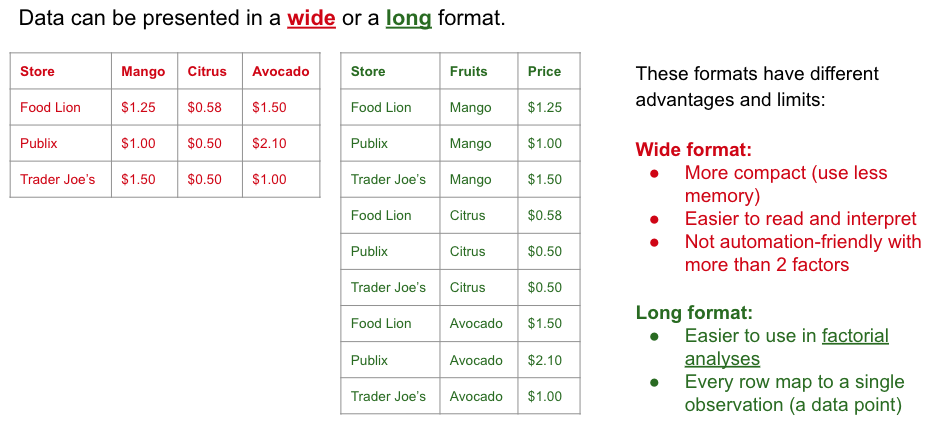

**In Pandas:**
* `?pd.DataFrame.pivot_table` to go from a long format to a wide format.
* `?pd.DataFrame.melt` to go from a wide format to a long format.


4. Prepare the dataset to be in wide format, compatible with Seaborn's heatmap and clustermap functions.

In [ ]:
ltee_mutations_rect = ltee_mutations.pivot_table(index='Population', columns='Generation', values='Total Mutations')
ltee_mutations_rect

Generation,500,1000,1500,2000,5000,10000,15000,20000,30000,40000,50000
Population,,,,,,,,,,,
Ara+1,3.5,3.0,6.5,8.5,20.5,33.5,47.5,55.0,80.0,94.0,113.0
Ara+2,2.0,4.0,5.5,8.5,11.5,24.0,32.0,35.0,46.5,56.0,67.0
Ara+3,2.5,4.0,6.0,8.5,149.5,353.0,648.5,872.0,1135.5,1534.5,1684.5
Ara+4,2.5,3.0,8.0,6.0,9.5,21.0,27.0,38.0,43.0,54.0,67.5
Ara+5,2.0,4.0,4.5,6.5,13.0,18.5,30.5,32.5,50.5,65.0,76.5
Ara+6,2.0,3.5,5.0,5.0,8.5,638.5,997.5,1296.5,1860.0,2103.0,2425.0
Ara-1,4.0,5.0,6.0,6.0,14.0,26.0,36.0,41.0,462.5,746.0,1096.0
Ara-2,2.0,3.5,4.0,5.5,131.5,308.0,540.0,647.0,733.0,1056.5,1057.0
Ara-3,2.0,4.5,6.0,9.5,16.0,25.5,34.0,44.0,57.0,241.5,772.5


5. Create a heatmap of the number of mutations by population and generation.

<Axes: xlabel='Generation', ylabel='Population'>

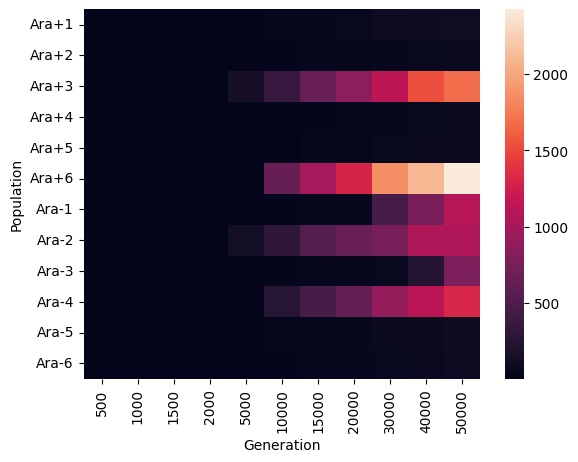

In [ ]:
sns.heatmap(ltee_mutations_rect)

Note that these data seems to have the halmark of a dataset scaled logarithmically (or at least, of a long-tail distribution). We can verify that:

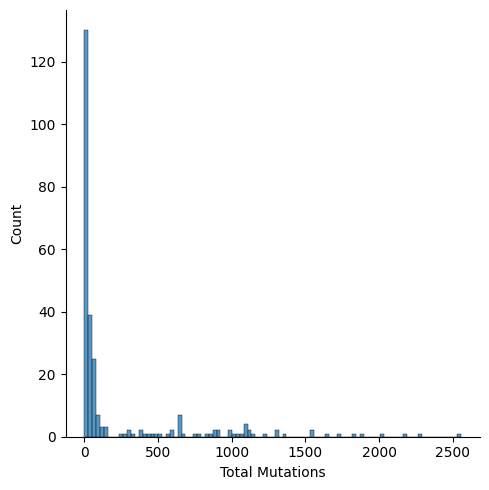

In [ ]:
g = sns.displot(ltee_mutations['Total Mutations'])

<Axes: xlabel='Generation', ylabel='Population'>

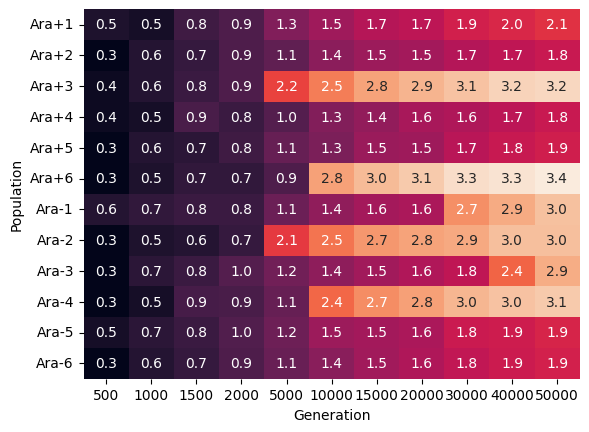

In [ ]:
sns.heatmap(np.log10(ltee_mutations_rect), annot=True, fmt=".1f", cbar=False)

6. The order of the populations does not necessarily make much sense here. Maybe we are more interested in grouping populations with similar behavior by permutating the rows. Here, we are not interested in permuting the columns because they indicate a linear progression in the number of generations, so they should remain ordered.

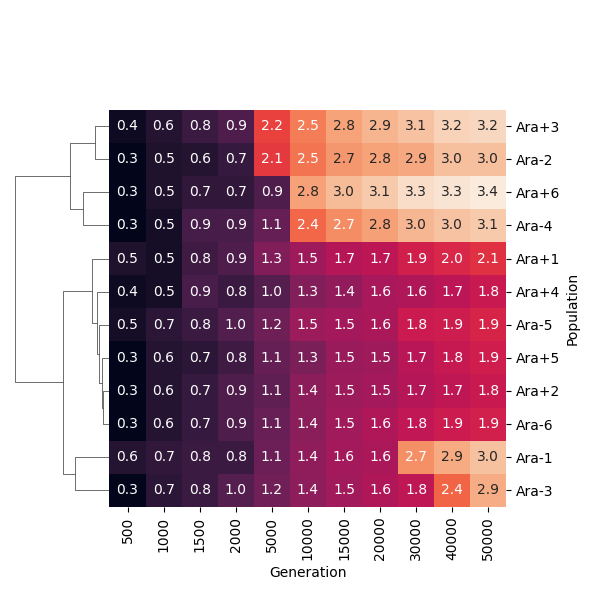

In [ ]:
sns.clustermap(np.log10(ltee_mutations_rect), col_cluster=False,
               annot=True, fmt=".1f", cbar_pos=None, figsize=(6, 6))

## Exercises


1.   Load the 'ltee_merged.csv' dataset. The URL of that dataset is given by `git_root + 'ltee_merged.csv'`.




2. View the top five rows of the dataset

3. **Sequencing Depth** refers to the average number of times each base is counted in a genome (Yifan et al. 2019).

Select just the three follwing columns: 'Population', 'Generation', and 'Sequencing Depth'

4. Prepare the dataset to be in a wide format, compatible with Seaborn's clustermap function

5.   Create a clustermap of sequencing depth by population and generation. Use a logarithmic scale for the sequencing depth and cluster only the rows (i.e., the populations).

# Homework

* Kaggle is a great resource to find open-access datasets and tutorials
* Follow [this Kaggle tutorial](https://www.kaggle.com/code/jchen2186/data-visualization-with-python-seaborn/notebook) and create the first two graphs:
  * A countplot showing the distribution of disorders
  * A pie chart showing the proportion of employees
* The dataset may be accessed as follows:
  * Click on 'Input' at the top of the tutorial page
  * Scroll down the list of files on the right until you find 'mental-health-in-tech-2016_20161114.csv'
  * Download this file to your local system.
  * To upload a file from your local system to Colab, you can use:
    ```python
      from google.colab import files
      files.upload()
    ```

# Resources used to create this tutorial/for additional practice

*   Example/tutorial: Data visualization on Seaborn 1: https://seaborn.pydata.org/examples/grouped_barplot.html
*   Example/tutorial: Data visualization on Seaborn 2: https://www.geeksforgeeks.org/data-visualization-with-seaborn-line-plot/
*   Example/tutorial: Visualizations using the LTEE dataset: https://github.com/melbournebioinformatics/data_tidying_and_visualisation/blob/master/Seaborn_Matplotlib.ipynb
*   Example/tutorial: Visualizations using the HBR_UHR genetics dataset: https://bioinformatics.ccr.cancer.gov/docs/pies-2023/pies_lesson4/,
*   Example/tutorial: Visualizations using the mental health dataset: https://www.kaggle.com/code/jchen2186/data-visualization-with-python-seaborn
*   Example/tutorial: Clustermap using a gene expression dataset: https://www.youtube.com/watch?v=kJbxoyLZGwg&t=757s
*  Background on sequencing depth: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3164-z

